In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from lazypredict import Supervised
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
import sklearn


# preprocessing
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor ## change "sparse" to "sparse_output" in the supervised.py file

# metrics
from sklearn.metrics import(
    r2_score, mean_absolute_error, mean_squared_error, 
    ConfusionMatrixDisplay, roc_curve, auc)

#widgets and display
import ipywidgets as widgets
from IPython.display import display

#SHAP explainer
import shap

#utilities
import pickle
import os
from tqdm import tqdm

c:\Users\ADMIN\anaconda3\envs\ds-gg\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load data set

In [2]:
from src.load_data import load_data
file_path = '../data/raw/housing_data.csv'
df = load_data(file_path)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.20,47.34
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.36,47.51
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.16,47.44
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.37,47.57
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.18,47.73


## Model Validation 

In [3]:
#Define target 
y=df['SalePrice']
X=df.drop(columns='SalePrice')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from src.preprocessor import create_preprocessing_pipeline

preprocessor = create_preprocessing_pipeline()

## Machine Learning

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import joblib


In [27]:
def evaluate_regression_model(model, X_train_transformed_df, y_train, X_test_transformed_df, y_test):
    # Create predictions
    train_preds = model.predict(X_train_transformed_df)
    test_preds = model.predict(X_test_transformed_df)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)

    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)

    # Print metrics
    print("Training set metrics:")
    print(f"MAE: {train_mae}")
    print(f"MSE: {train_mse}")
    print(f"R²: {train_r2}")
    print()
    print("Testing set metrics:")
    print(f"MAE: {test_mae}")
    print(f"MSE: {test_mse}")
    print(f"R²: {test_r2}")

    # Plot predictions vs true values
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].scatter(y_train, train_preds, alpha=0.3)
    axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
    axes[0].set_xlabel('True Values')
    axes[0].set_ylabel('Predictions')
    axes[0].set_title('Train Set: True vs Predicted Values')
    
    axes[1].scatter(y_test, test_preds, alpha=0.3)
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    axes[1].set_xlabel('True Values')
    axes[1].set_ylabel('Predictions')
    axes[1].set_title('Test Set: True vs Predicted Values')
    
    plt.show()

    return {
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
    }

if __name__ == '__main__':
    pass

def save_model(model, model_path):
    joblib.dump(model, model_path)
    print(f'Model Saved to {model_path}')

In [8]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [9]:
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_test_transformed_df = pd.DataFrame(X_test_transformed)

In [29]:
from src.train_predict import train_and_predict_model
train_model = train_and_predict_model

Training set metrics:
MAE: 62439.707304461626
MSE: 8105597982.111396
R²: 0.9089129432095002

Testing set metrics:
MAE: 96660.45926812722
MSE: 21083018980.52369
R²: 0.7586616551860479


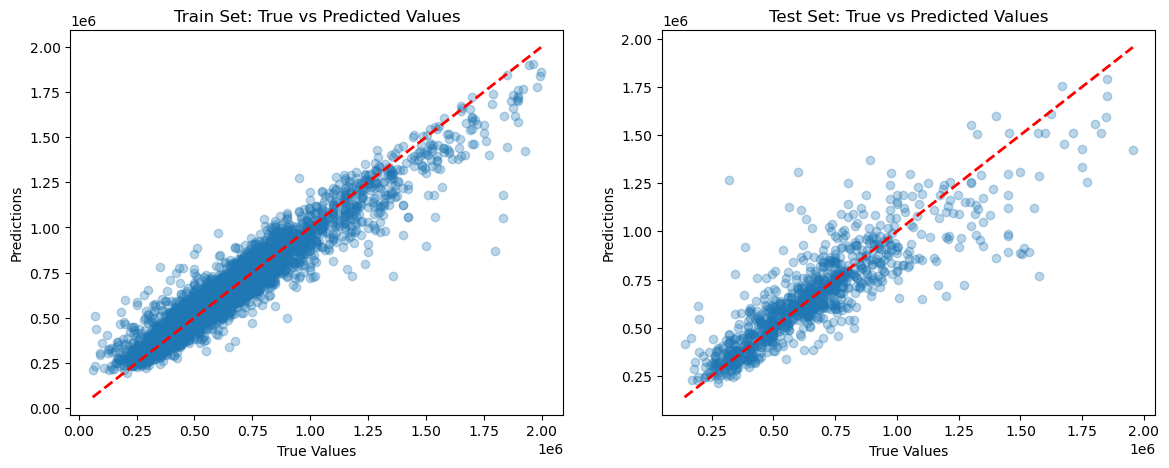

{'train_mae': 62439.707304461626,
 'test_mae': 96660.45926812722,
 'train_mse': 8105597982.111396,
 'test_mse': 21083018980.52369,
 'train_r2': 0.9089129432095002,
 'test_r2': 0.7586616551860479}

In [30]:
lgbm_model = LGBMRegressor()
# Extracting the model from the returned tuple
trained_lgbm_model = train_and_predict_model(X_train_transformed_df, y_train, X_test_transformed_df, preprocessor, lgbm_model)

# Evaluate the regression model
evaluate_regression_model(trained_lgbm_model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)

Training set metrics:
MAE: 94427.28145653813
MSE: 19543401369.161503
R²: 0.780380063960606

Testing set metrics:
MAE: 106310.82009218358
MSE: 25898229454.58053
R²: 0.7035417064342484


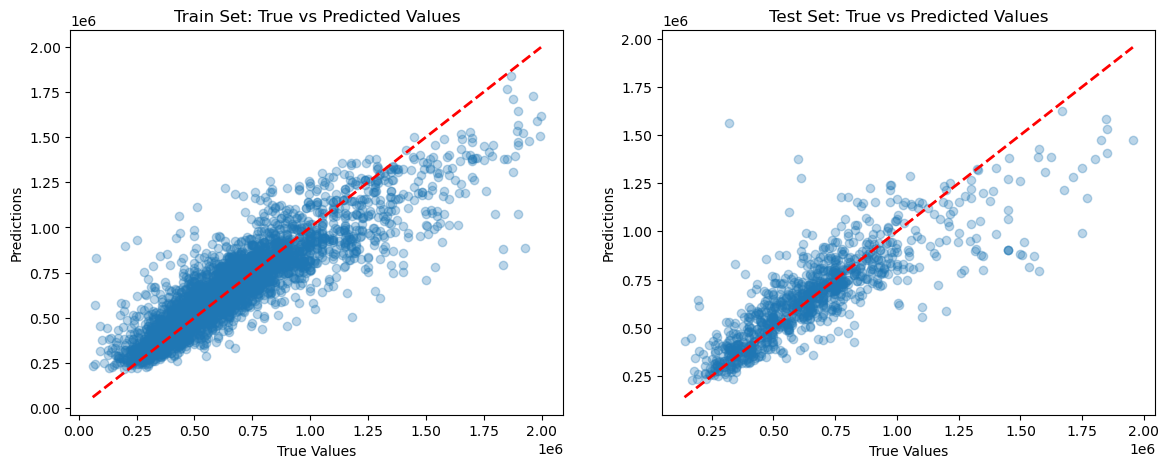

{'train_mae': 94427.28145653813,
 'test_mae': 106310.82009218358,
 'train_mse': 19543401369.161503,
 'test_mse': 25898229454.58053,
 'train_r2': 0.780380063960606,
 'test_r2': 0.7035417064342484}

In [31]:
gbr_model = GradientBoostingRegressor()
# Extracting the model from the returned tuple
trained_gbr_model = train_and_predict_model(X_train_transformed_df, y_train, X_test_transformed_df, preprocessor, gbr_model)

# Evaluate the regression model
evaluate_regression_model(trained_gbr_model, X_train_transformed_df, y_train, X_test_transformed_df, y_test)

In [14]:
# Function to train the model
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

# Function to get feature importance
def get_feature_importance(model, feature_names):
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': importance,
    }).sort_values(by='importance', ascending=False)
    return feature_importance

# Plot the features with a color palette
def plot_feature_importance(feature_importance, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x='importance',
        y='feature',
        data=feature_importance,
        palette='viridis'
    )
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

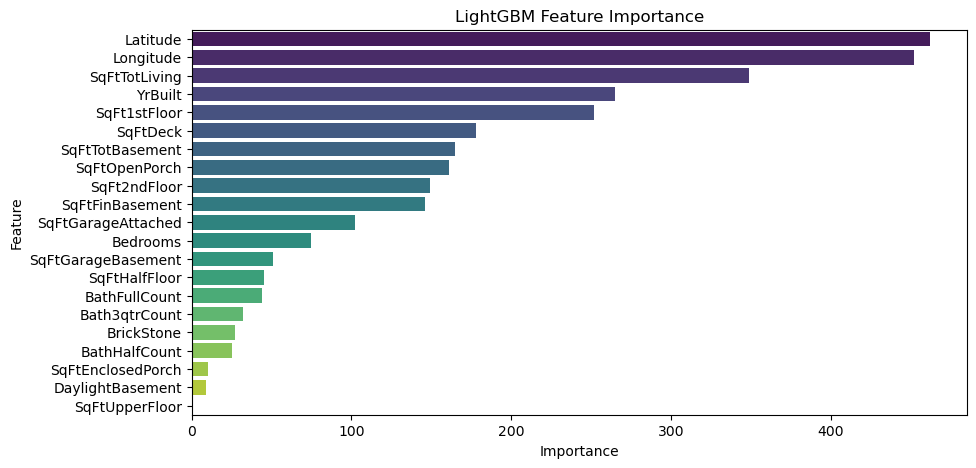

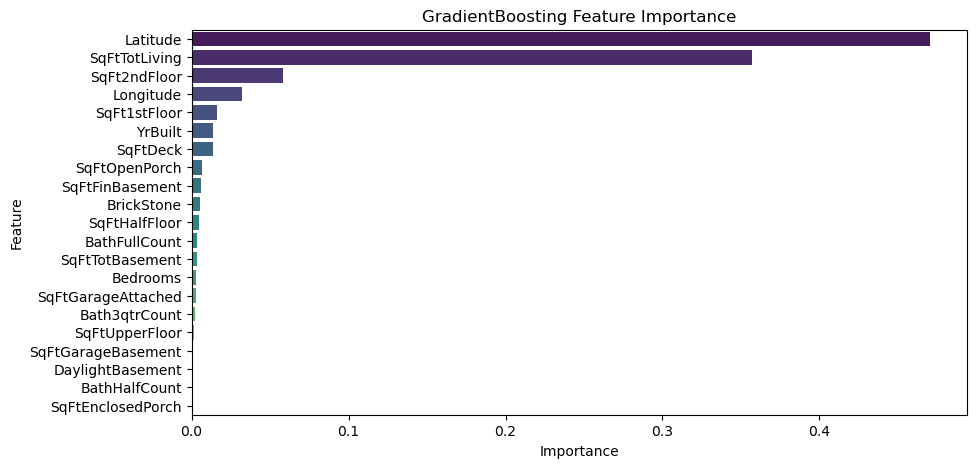

In [15]:
# Get feature names
feature_names = X_train.columns

# Train and plot LightGBM model feature importance
trained_lgbm_model = train_model(lgbm_model, X_train, y_train)
lgbm_feature_importance = get_feature_importance(trained_lgbm_model, feature_names)
plot_feature_importance(lgbm_feature_importance, 'LightGBM Feature Importance')

# Train and plot GradientBoostingRegressor model feature importance
trained_gbr_model = train_model(gbr_model, X_train, y_train)
gbr_feature_importance = get_feature_importance(trained_gbr_model, feature_names)
plot_feature_importance(gbr_feature_importance, 'GradientBoosting Feature Importance')